<a href="https://colab.research.google.com/github/rajan0112/Projects/blob/main/Final_Team_6_Stock_Price_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stock Price Dashboard**

Read all the instructions before using it.

* There are 3 dashboards which can provide visualizations of many Ticker symbols.
* First Dashboard can be used to visualize individual ticker symbols for their different prices (Opening Price, Closing Price, Highest and Lowest). Period is categorised into two types:-
    1.   Daily - Provides the recent visualizations of the stocks. Everyday trading prices can be viewed.(Only limited to last 6 months due to API limitations.)
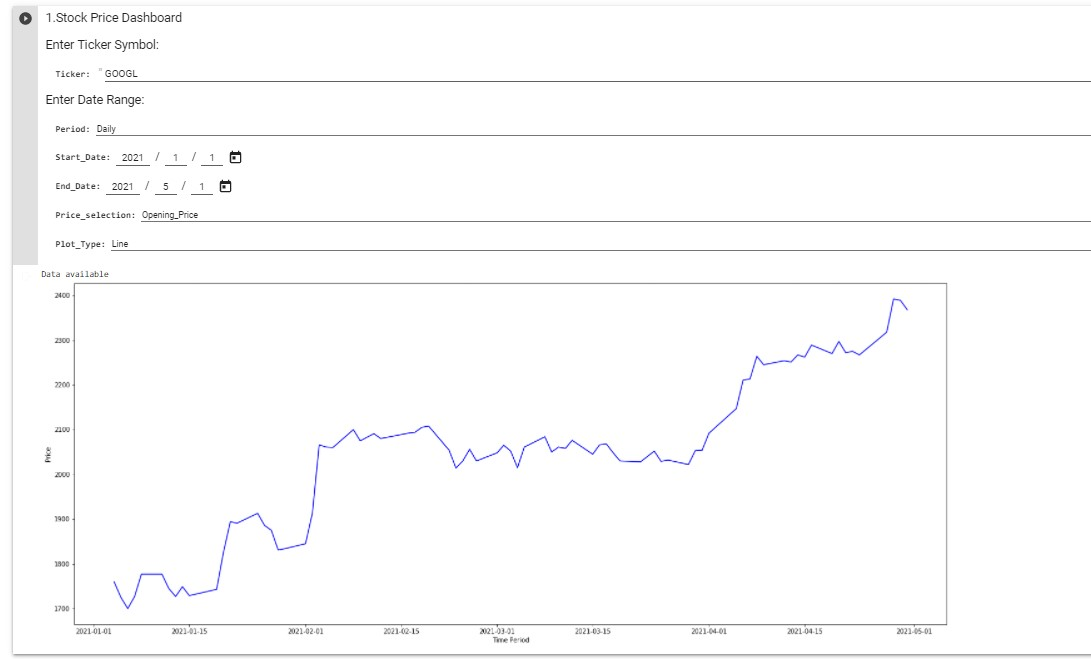
    2.   Monthly - Provides the visualizations of stock's trading prices of each month.(Prices upto last 20 years can be viewed if company ticker was in existence.)

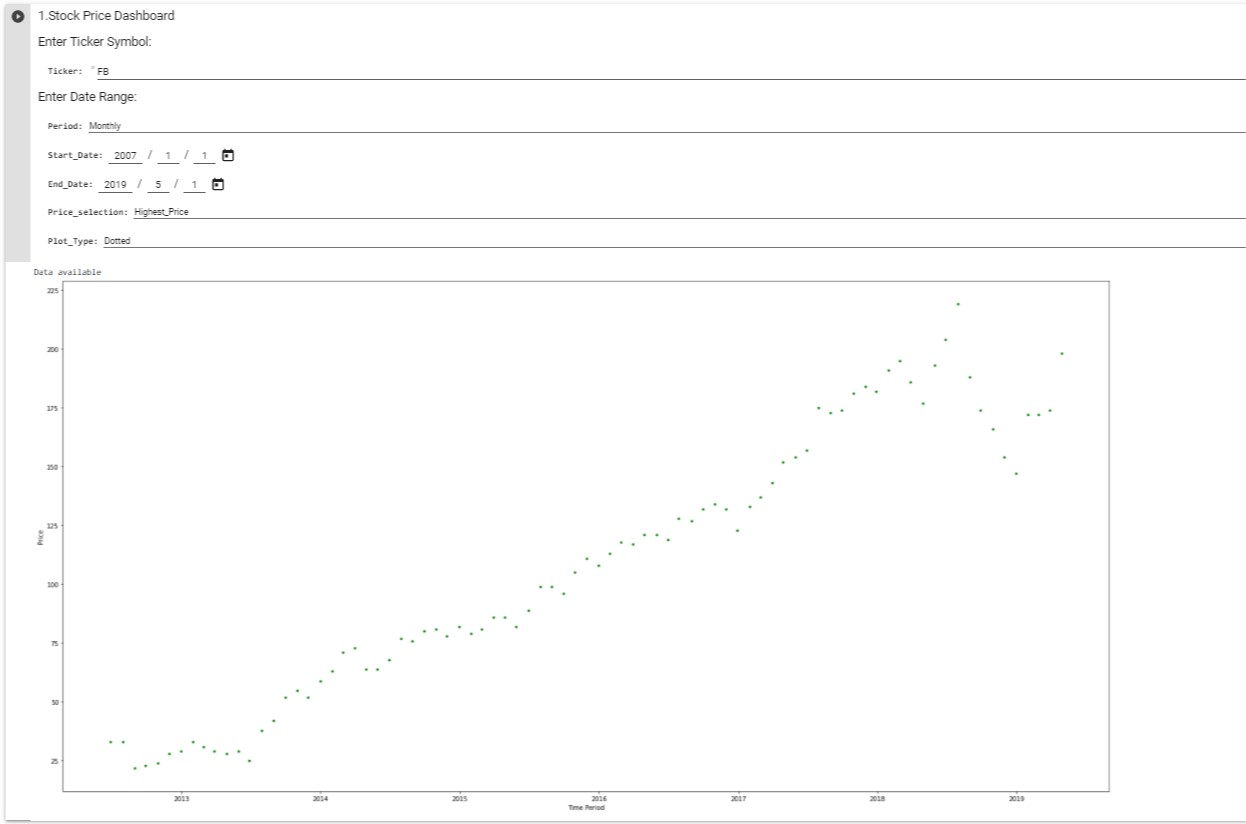

* Second dashboard can be used to visualize EMA( Exponential Moving Average) of a stock over a period of time. There are not period categorisations.
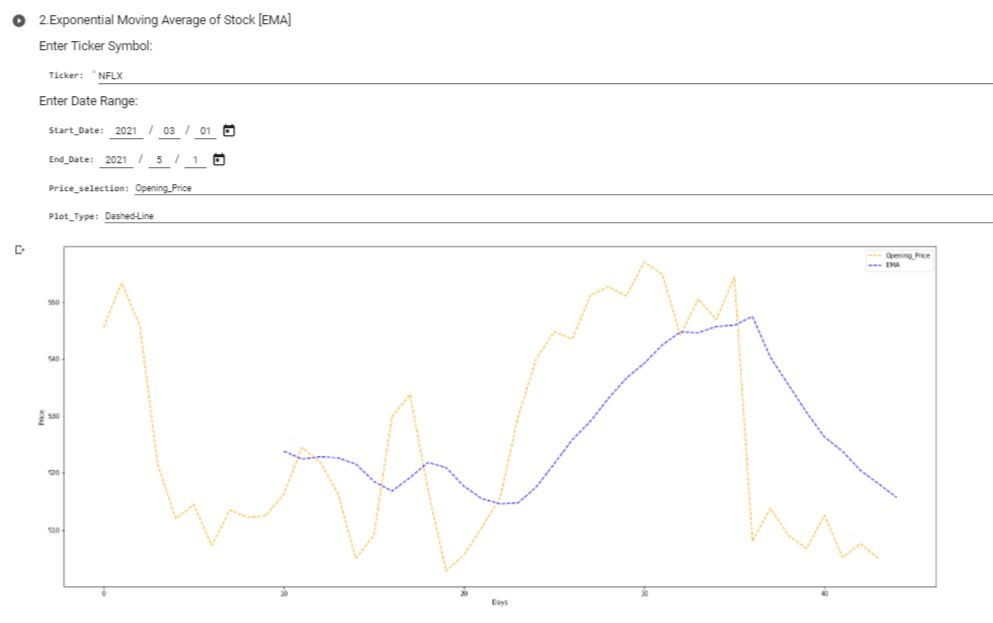

* Third Dashboard can be used to visualize and compare two different stock tickers for different prices over a same period of time. Above mentioned Daily and Monthly categorisations are also valid here. 
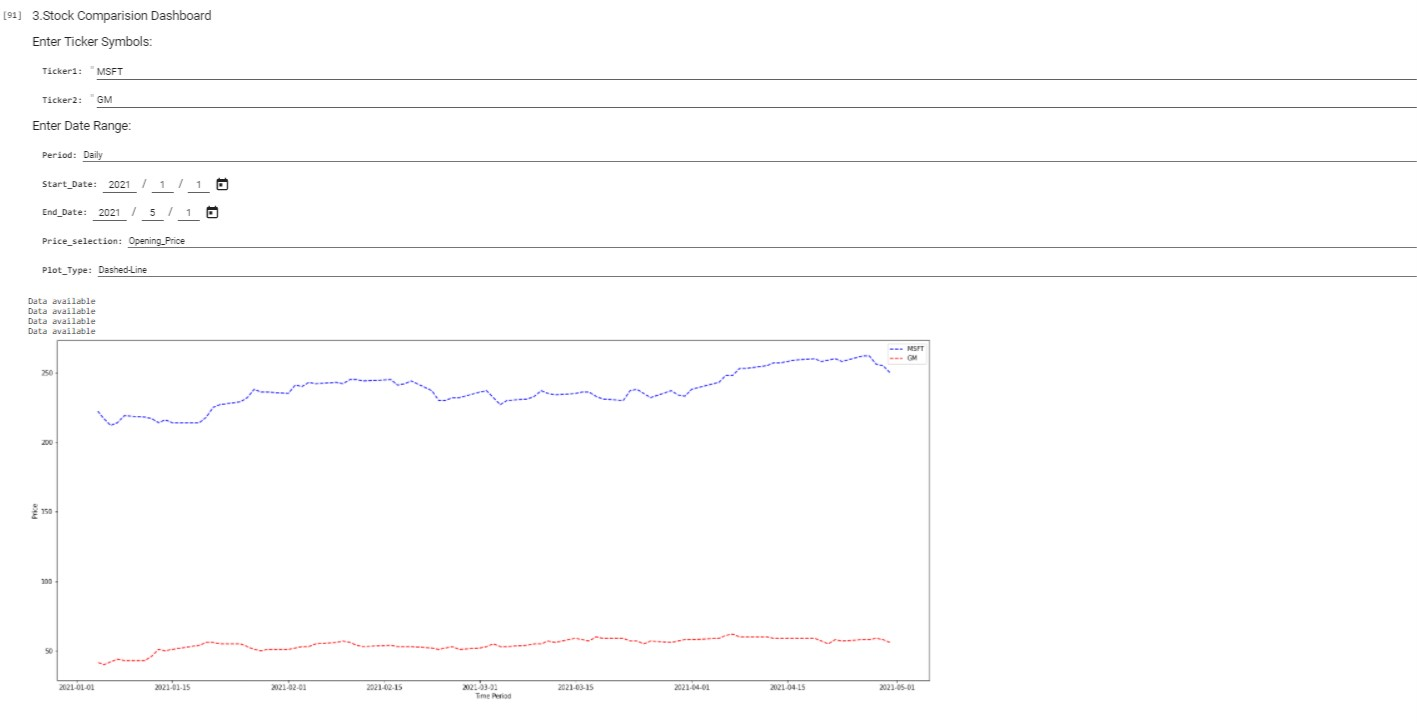
Before beginning, Please run the following tabs in the given order:-

* First run the package installation tab and wait till whole installation is completed.
* After package installation, check the database connection. Database version should be printed.
* Then, run the source code tab and wait it to compile.
*Lastly, go to the any dashboard, put ticker symbol, choose period, price and plot type. And bingo! Dashboard is now ready for the visualizations of your favourite tickers.





In [ ]:
#@title Package Installation 

!sudo apt-get install python3-dev default-libmysqlclient-dev &> /dev/null
!pip install mysqlclient &> /dev/null
!sudo pip3 install python3-wget &> /dev/null
!sudo -H pip install -U pandasql &> /dev/null
!sudo apt-get install -y python-dev libmysqlclient-dev && sudo pip install mysqlclient &> /dev/null
!sudo -H pip3 install -U sqlalchemy &> /dev/null

In [ ]:
#@title Database Connection

import MySQLdb as mdb
from sqlalchemy import create_engine

host = 'bigdata.stern.nyu.edu'
username = 'DealingS21'
password = 'DealingS21!!'
database = 'DealingS21GB6'

con = mdb.connect(host, username, password, database, 
                charset='utf8', use_unicode=True);

conn_string_stock = 'mysql://{user}:{password}@{host}:{port}/{db}'.format(
    user='DealingS21', 
    password='DealingS21!!', 
    host = 'bigdata.stern.nyu.edu', 
    port=3306, 
    db='DealingS21GB6'
)                
engine_stock = create_engine(conn_string_stock)
cur = con.cursor()
cur.execute("SELECT VERSION()")
ver = cur.fetchone()
print("Database version:", ver)



In [ ]:
#@title Source Code

##File Check##
def first_char(filename):
  with open(filename) as f:
    first_line=f.readline()
    char=first_line[0]
  return char

##main function##

def stock_daily(Ticker):
  url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={sym}&apikey=9ZQTQPU4E5U3HWLZ&datatype=csv".format(sym=Ticker)
  con = mdb.connect(host, username, password, database, charset='utf8', use_unicode=True);
  cur = con.cursor()
  tkr_check = "select ticker_symbol from ticker where ticker_symbol='{sym}'".format(sym=Ticker)
  cur.execute(tkr_check)
  results = cur.fetchall()

  if len(results) == 0:
    print("Fetching the Data......")
    filename = wget.download(url,'temp.csv')
    file = pathlib.Path("temp.csv")
    if file.exists () and first_char("temp.csv") == 't':
      insert_tkr ="insert into ticker(ticker_symbol) values('{sym}')".format(sym=Ticker)
      cur.execute(insert_tkr)
      cur.execute("commit")
      inrt_temp="""LOAD DATA LOCAL INFILE '/content/temp.csv' 
      INTO TABLE temp 
      FIELDS TERMINATED BY ',' 
      ENCLOSED BY '"'
      LINES TERMINATED BY '\n'
      IGNORE 1 ROWS"""
      cur.execute(inrt_temp)
      cur.execute("commit")
      price_insrt="""insert into price(ticker_id,time,open_price,highest_price,lowest_price,closing_price,volume,div_amt,split_coff) 
      select (select ticker_id from ticker where ticker_symbol='{sym}'),time,open_price,highest_price,lowest_price,closing_price,volume,div_amt,split_coff from temp""".format(sym=Ticker)
      cur.execute(price_insrt)
      cur.execute("truncate table temp")
      cur.execute("commit")
      !rm -rf temp*
    else:
      !rm -rf temp*
      sys.exit("Data Unavailable. Please check the Ticker symbol.")
  else:
    print("Data available")
  
  if Price_selection == "Opening_Price":
    stock_query="""select open_price,time from price where ticker_id=(select ticker_id from ticker where ticker_symbol='{sym}') and DATE(time) between '{sdate}' and '{edate}'""".format(sym=Ticker,sdate=Start_Date,edate=End_Date)
    cur.execute(stock_query)
    result = cur.fetchall()
    df = pd.DataFrame(list(result),columns=["open_price","time"])
    x=df.time
    y=df.open_price
    plt.figure(figsize=(25,10))
    plt.xlabel('Time Period')
    plt.ylabel('Price')
    z=plt.plot(x,y,PT,color='blue')
      
  elif Price_selection == "Closing_Price":
    stock_query="""select closing_price,time from price where ticker_id=(select ticker_id from ticker where ticker_symbol='{sym}') and DATE(time) between '{sdate}' and '{edate}'""".format(sym=Ticker,sdate=Start_Date,edate=End_Date)
    cur.execute(stock_query)
    result = cur.fetchall()
    df = pd.DataFrame(list(result),columns=["closing_price","time"])
    x=df.time
    y=df.closing_price
    plt.figure(figsize=(25,10))
    plt.xlabel('Time Period')
    plt.ylabel('Price')
    z=plt.plot(x,y,PT,color='red')
      
  elif Price_selection == "Highest_Price":
    stock_query="""select highest_price,time from price where ticker_id=(select ticker_id from ticker where ticker_symbol='{sym}') and DATE(time) between '{sdate}' and '{edate}'""".format(sym=Ticker,sdate=Start_Date,edate=End_Date)
    cur.execute(stock_query)
    result = cur.fetchall()
    df = pd.DataFrame(list(result),columns=["highest_price","time"])
    x=df.time
    y=df.highest_price
    plt.figure(figsize=(25,10))
    plt.xlabel('Time Period')
    plt.ylabel('Price')
    z=plt.plot(x,y,PT,color='green')
       
  elif Price_selection == "Lowest_Price":
    stock_query="""select lowest_price,time from price where ticker_id=(select ticker_id from ticker where ticker_symbol='{sym}') and DATE(time) between '{sdate}' and '{edate}'""".format(sym=Ticker,sdate=Start_Date,edate=End_Date)
    cur.execute(stock_query)
    result = cur.fetchall()
    df = pd.DataFrame(list(result),columns=["lowest_price","time"])
    x=df.time
    y=df.lowest_price
    plt.figure(figsize=(25,10))
    plt.xlabel('Time Period')
    plt.ylabel('Price')
    z=plt.plot(x,y,PT,color='orange')
      
  else:
    stock_query="""select open_price,closing_price,highest_price,lowest_price,time from price where ticker_id=(select ticker_id from ticker where ticker_symbol='{sym}') and DATE(time) between '{sdate}' and '{edate}'""".format(sym=Ticker,sdate=Start_Date,edate=End_Date)
    cur.execute(stock_query)
    result = cur.fetchall()
    df = pd.DataFrame(list(result),columns=["open_price","closing_price","highest_price","lowest_price","time"])
    a=df.time
    b=df.open_price
    c=df.closing_price
    d=df.highest_price
    e=df.lowest_price
    plt.figure(figsize=(25,15))
    plt.xlabel('Time Period')
    plt.ylabel('Price')
    plt.plot(a,b,PT,color='blue',label='Opening Price')
    plt.plot(a,c,PT,color='red',label='Closing Price')
    plt.plot(a,d,PT,color='green',label='Highest Price')
    plt.plot(a,e,PT,color='orange',label='Lowest Price')
    plt.legend()
    z=plt.show()

  return z

##Monthly Stock Fetcher###

def stock_monthly(Ticker):
  murl = "https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol={sym}&apikey=9ZQTQPU4E5U3HWLZ&datatype=csv".format(sym=Ticker)
  con = mdb.connect(host, username, password, database, charset='utf8', use_unicode=True);
  cur = con.cursor()
  tkr_chck = "select ticker_symbol from ticker_m where ticker_symbol='{sym}'".format(sym=Ticker)
  cur.execute(tkr_chck)
  results = cur.fetchall()

  if len(results) == 0:
    print("Fetching the Data......")
    filename = wget.download(murl,'temp.csv')
    file = pathlib.Path("temp.csv")
    if file.exists () and first_char("temp.csv") == 't':
      insrt_tkr ="insert into ticker_m(ticker_symbol) values('{sym}')".format(sym=Ticker)
      cur.execute(insrt_tkr)
      cur.execute("commit")
      int_temp="""LOAD DATA LOCAL INFILE '/content/temp.csv' 
      INTO TABLE temp_m 
      FIELDS TERMINATED BY ',' 
      ENCLOSED BY '"'
      LINES TERMINATED BY '\n'
      IGNORE 1 ROWS"""
      cur.execute(int_temp)
      cur.execute("commit")
      price_inrt="""insert into price_m(ticker_id,time,open_price,highest_price,lowest_price,closing_price,volume,div_amt) 
      select (select ticker_id from ticker_m where ticker_symbol='{sym}'),time,open_price,highest_price,lowest_price,closing_price,volume,div_amt from temp_m""".format(sym=Ticker)
      cur.execute(price_inrt)
      cur.execute("truncate table temp_m")
      cur.execute("commit")
      !rm -rf temp*
    else:
      !rm -rf temp*
      sys.exit("Data Unavailable. Please check the Ticker symbol.")
  else: 
    print("Data available")
  
  if Price_selection == "Opening_Price":
    stock_query="""select open_price,time from price_m where ticker_id=(select ticker_id from ticker_m where ticker_symbol='{sym}') and DATE(time) between '{sdate}' and '{edate}'""".format(sym=Ticker,sdate=Start_Date,edate=End_Date)
    cur.execute(stock_query)
    result = cur.fetchall()
    df = pd.DataFrame(list(result),columns=["open_price","time"])
    x=df.time
    y=df.open_price
    plt.figure(figsize=(30,15))
    plt.xlabel('Time Period')
    plt.ylabel('Price')
    z=plt.plot(x,y,PT,color='blue')
        

  elif Price_selection == "Closing_Price":
    stock_query="""select closing_price,time from price_m where ticker_id=(select ticker_id from ticker_m where ticker_symbol='{sym}') and DATE(time) between '{sdate}' and '{edate}'""".format(sym=Ticker,sdate=Start_Date,edate=End_Date)
    cur.execute(stock_query)
    result = cur.fetchall()
    df = pd.DataFrame(list(result),columns=["closing_price","time"])
    x=df.time
    y=df.closing_price
    plt.figure(figsize=(30,15))
    plt.xlabel('Time Period')
    plt.ylabel('Price')
    z=plt.plot(x,y,PT,color='red')
        

  elif Price_selection == "Highest_Price":
    stock_query="""select highest_price,time from price_m where ticker_id=(select ticker_id from ticker_m where ticker_symbol='{sym}') and DATE(time) between '{sdate}' and '{edate}'""".format(sym=Ticker,sdate=Start_Date,edate=End_Date)
    cur.execute(stock_query)
    result = cur.fetchall()
    df = pd.DataFrame(list(result),columns=["highest_price","time"])
    x=df.time
    y=df.highest_price
    plt.figure(figsize=(30,15))
    plt.xlabel('Time Period')
    plt.ylabel('Price')
    z=plt.plot(x,y,PT,color='green')
        

  elif Price_selection == "Lowest_Price":
    stock_query="""select lowest_price,time from price_m where ticker_id=(select ticker_id from ticker_m where ticker_symbol='{sym}') and DATE(time) between '{sdate}' and '{edate}'""".format(sym=Ticker,sdate=Start_Date,edate=End_Date)
    cur.execute(stock_query)
    result = cur.fetchall()
    df = pd.DataFrame(list(result),columns=["lowest_price","time"])
    x=df.time
    y=df.lowest_price
    plt.figure(figsize=(30,15))
    plt.xlabel('Time Period')
    plt.ylabel('Price')
    z=plt.plot(x,y,PT,color='orange')
     
  else:
    stock_query="""select open_price,closing_price,highest_price,lowest_price,time from price_m where ticker_id=(select ticker_id from ticker_m where ticker_symbol='{sym}') and DATE(time) between '{sdate}' and '{edate}'""".format(sym=Ticker,sdate=Start_Date,edate=End_Date)
    cur.execute(stock_query)
    result = cur.fetchall()
    df = pd.DataFrame(list(result),columns=["open_price","closing_price","highest_price","lowest_price","time"])
    a=df.time
    b=df.open_price
    c=df.closing_price
    d=df.highest_price
    e=df.lowest_price
    plt.figure(figsize=(30,20))
    plt.xlabel('Time Period')
    plt.ylabel('Price')
    plt.plot(a,b,PT,color='blue',label='Opening Price')
    plt.plot(a,c,PT,color='red',label='Closing Price')
    plt.plot(a,d,PT,color='green',label='Highest Price')
    plt.plot(a,e,PT,color='orange',label='Lowest Price')
    plt.legend()
    z=plt.show()

  return z

##EMA Calculation###

def cal_ema(price, days, w_fac=2):
  ema = [sum(price[:days]) / days]
  for i in price[days:]:
    ema.append((i * (w_fac / (1 + days))) + ema[-1] * (1 - (w_fac / (1 + days))))
  return ema
    
##Stock Comparision##

def stock_daily_comp(Ticker):
  url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={sym}&apikey=9ZQTQPU4E5U3HWLZ&datatype=csv".format(sym=Ticker)
  con = mdb.connect(host, username, password, database, charset='utf8', use_unicode=True);
  cur = con.cursor()
  tkr_check = "select ticker_symbol from ticker where ticker_symbol='{sym}'".format(sym=Ticker)
  cur.execute(tkr_check)
  results = cur.fetchall()

  if len(results) == 0:
    print("Fetching the Data......")
    filename = wget.download(url,'temp.csv')
    file = pathlib.Path("temp.csv")
    if file.exists () and first_char("temp.csv") == 't':
      insert_tkr ="insert into ticker(ticker_symbol) values('{sym}')".format(sym=Ticker)
      cur.execute(insert_tkr)
      cur.execute("commit")
      inrt_temp="""LOAD DATA LOCAL INFILE '/content/temp.csv' 
      INTO TABLE temp 
      FIELDS TERMINATED BY ',' 
      ENCLOSED BY '"'
      LINES TERMINATED BY '\n'
      IGNORE 1 ROWS"""
      cur.execute(inrt_temp)
      cur.execute("commit")
      price_insrt="""insert into price(ticker_id,time,open_price,highest_price,lowest_price,closing_price,volume,div_amt,split_coff) 
      select (select ticker_id from ticker where ticker_symbol='{sym}'),time,open_price,highest_price,lowest_price,closing_price,volume,div_amt,split_coff from temp""".format(sym=Ticker)
      cur.execute(price_insrt)
      cur.execute("truncate table temp")
      cur.execute("commit")
      !rm -rf temp*
    else:
      !rm -rf temp*
      sys.exit("Data Unavailable. Please check the Ticker symbols.")
  else: 
    print("Data available")
  
  if Price_selection == "Opening_Price":
    stock_query="""select open_price,time from price where ticker_id=(select ticker_id from ticker where ticker_symbol='{sym}') and DATE(time) between '{sdate}' and '{edate}'""".format(sym=Ticker,sdate=Start_Date,edate=End_Date)
    cur.execute(stock_query)
    result = cur.fetchall()
    df_Ticker = pd.DataFrame(list(result),columns=["open_price","time"])
      
  elif Price_selection == "Closing_Price":
    stock_query="""select closing_price,time from price where ticker_id=(select ticker_id from ticker where ticker_symbol='{sym}') and DATE(time) between '{sdate}' and '{edate}'""".format(sym=Ticker,sdate=Start_Date,edate=End_Date)
    cur.execute(stock_query)
    result = cur.fetchall()
    df_Ticker = pd.DataFrame(list(result),columns=["closing_price","time"])
    
  elif Price_selection == "Highest_Price":
    stock_query="""select highest_price,time from price where ticker_id=(select ticker_id from ticker where ticker_symbol='{sym}') and DATE(time) between '{sdate}' and '{edate}'""".format(sym=Ticker,sdate=Start_Date,edate=End_Date)
    cur.execute(stock_query)
    result = cur.fetchall()
    df_Ticker = pd.DataFrame(list(result),columns=["highest_price","time"])

  elif Price_selection == "Lowest_Price":
    stock_query="""select lowest_price,time from price where ticker_id=(select ticker_id from ticker where ticker_symbol='{sym}') and DATE(time) between '{sdate}' and '{edate}'""".format(sym=Ticker,sdate=Start_Date,edate=End_Date)
    cur.execute(stock_query)
    result = cur.fetchall()
    df_Ticker = pd.DataFrame(list(result),columns=["lowest_price","time"])

  else:
    stock_query="""select open_price,closing_price,highest_price,lowest_price,time from price_m where ticker_id=(select ticker_id from ticker_m where ticker_symbol='{sym}') and DATE(time) between '{sdate}' and '{edate}'""".format(sym=Ticker,sdate=Start_Date,edate=End_Date)
    cur.execute(stock_query)
    result = cur.fetchall()
    df_Ticker = pd.DataFrame(list(result),columns=["open_price","closing_price","highest_price","lowest_price","time"])
   
  cur.close()    
  return df_Ticker
    
    
def stock_monthly_comp(Ticker):
  murl = "https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol={sym}&apikey=9ZQTQPU4E5U3HWLZ&datatype=csv".format(sym=Ticker)
  con = mdb.connect(host, username, password, database, charset='utf8', use_unicode=True);
  cur = con.cursor()
  tkr_chck = "select ticker_symbol from ticker_m where ticker_symbol='{sym}'".format(sym=Ticker)
  cur.execute(tkr_chck)
  results = cur.fetchall()

  if len(results) == 0:
    print("Fetching the Data......")
    filename = wget.download(murl,'temp.csv')
    file = pathlib.Path("temp.csv")
    if file.exists () and first_char("temp.csv") == 't':
      insrt_tkr ="insert into ticker_m(ticker_symbol) values('{sym}')".format(sym=Ticker)
      cur.execute(insrt_tkr)
      cur.execute("commit")
      int_temp="""LOAD DATA LOCAL INFILE '/content/temp.csv' 
      INTO TABLE temp_m 
      FIELDS TERMINATED BY ',' 
      ENCLOSED BY '"'
      LINES TERMINATED BY '\n'
      IGNORE 1 ROWS"""
      cur.execute(int_temp)
      cur.execute("commit")
      price_inrt="""insert into price_m(ticker_id,time,open_price,highest_price,lowest_price,closing_price,volume,div_amt) 
      select (select ticker_id from ticker_m where ticker_symbol='{sym}'),time,open_price,highest_price,lowest_price,closing_price,volume,div_amt from temp_m""".format(sym=Ticker)
      cur.execute(price_inrt)
      cur.execute("truncate table temp_m")
      cur.execute("commit")
      !rm -rf temp*
    else:
      !rm -rf temp*
      sys.exit("Data Unavailable. Please check the Ticker symbols.")
  else: 
    print("Data available")
  
  if Price_selection == "Opening_Price":
    stock_query="""select open_price,time from price_m where ticker_id=(select ticker_id from ticker_m where ticker_symbol='{sym}') and DATE(time) between '{sdate}' and '{edate}'""".format(sym=Ticker,sdate=Start_Date,edate=End_Date)
    cur.execute(stock_query)
    result = cur.fetchall()
    df_ticker = pd.DataFrame(list(result),columns=["open_price","time"])

  elif Price_selection == "Closing_Price":
    stock_query="""select closing_price,time from price_m where ticker_id=(select ticker_id from ticker_m where ticker_symbol='{sym}') and DATE(time) between '{sdate}' and '{edate}'""".format(sym=Ticker,sdate=Start_Date,edate=End_Date)
    cur.execute(stock_query)
    result = cur.fetchall()
    df_ticker = pd.DataFrame(list(result),columns=["closing_price","time"])


  elif Price_selection == "Highest_Price":
    stock_query="""select highest_price,time from price_m where ticker_id=(select ticker_id from ticker_m where ticker_symbol='{sym}') and DATE(time) between '{sdate}' and '{edate}'""".format(sym=Ticker,sdate=Start_Date,edate=End_Date)
    cur.execute(stock_query)
    result = cur.fetchall()
    df_ticker = pd.DataFrame(list(result),columns=["highest_price","time"])
        
  else:
    stock_query="""select lowest_price,time from price_m where ticker_id=(select ticker_id from ticker_m where ticker_symbol='{sym}') and DATE(time) between '{sdate}' and '{edate}'""".format(sym=Ticker,sdate=Start_Date,edate=End_Date)
    cur.execute(stock_query)
    result = cur.fetchall()
    df_ticker = pd.DataFrame(list(result),columns=["lowest_price","time"])
  cur.close()
  return df_ticker
    
###
print("Source code compiled")
    



In [ ]:
import MySQLdb as mdb
import pathlib
import wget
import sys 
from pandasql import sqldf
from sqlalchemy import create_engine
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#@title 1.Stock Price Dashboard
#@markdown ### Enter Ticker Symbol:
Ticker = 'FB' #@param {type:"string"}
#@markdown ### Enter Date Range:
Period = "Daily" #@param ["Daily", "Monthly"]
Start_Date = "2021-01-01" #@param {type:"date"}
End_Date = "2021-05-01" #@param {type:"date"}
Price_selection = "All" #@param ["Opening_Price", "Closing_Price", "Highest_Price", "Lowest_Price", "All"]
Plot_Type = "Dashed-Line" #@param ["Line", "Dashed-Line", "Dotted"]

if Plot_Type== "Line":
  PT='r'
elif Plot_Type== "Dashed-Line":
  PT='--'
else:
  PT='.'


if End_Date > Start_Date:
  if Period == "Daily":
    stock_daily(Ticker)
  else:
    stock_monthly(Ticker)
else:
  print("Error: Start date must be an earlier date than End date")

cur.close()


    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
#@title 2.Exponential Moving Average of Stock [EMA]
#@markdown ### Enter Ticker Symbol:
Ticker = 'NFLX' #@param {type:"string"}
#@markdown ### Enter Date Range:
Start_Date = "2018-03-01" #@param {type:"date"}
End_Date = "2021-05-01" #@param {type:"date"}
Price_selection = "Opening_Price" #@param ["Opening_Price", "Closing_Price", "Highest_Price", "Lowest_Price"]
Plot_Type = "Dashed-Line" #@param ["Line", "Dashed-Line", "Dotted"]

if Plot_Type== "Line":
  PT='r'
elif Plot_Type == "Dashed-Line":
  PT='--'
else:
  PT='.'

df = web.DataReader(Ticker, 'yahoo', Start_Date, End_Date)


if Price_selection == "Opening_Price":
  DT='Open'
  ema = cal_ema(df['Open'], 10)
elif Price_selection == "Closing_Price":
  DT='Close'
  ema = cal_ema(df['Close'], 10)
elif Price_selection == "Highest_Price":
  DT='High'
  ema = cal_ema(df['High'], 10)
else:
  DT='Low'
  ema = cal_ema(df['Low'], 10)

price_X = np.arange(df.shape[0]) 
ema_X = np.arange(10, df.shape[0]+1)
plt.figure(figsize=(25,10))
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(price_X, df[DT],PT,color='orange', label=Price_selection)
plt.plot(ema_X, ema,PT,label='EMA',color='blue')
plt.legend()
plt.show()



In [ ]:
import MySQLdb as mdb
import pathlib
import wget
from pandasql import sqldf
from sqlalchemy import create_engine
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
#@title 3.Stock Comparision Dashboard
#@markdown ### Enter Ticker Symbols:
Ticker1 = 'MSFT' #@param {type:"string"}
Ticker2 = 'IBM' #@param {type:"string"}
#@markdown ### Enter Date Range:
Period = "Monthly" #@param ["Daily", "Monthly"]
Start_Date = "2009-01-01" #@param {type:"date"}
End_Date = "2021-05-01" #@param {type:"date"}
Price_selection = "Highest_Price" #@param ["Opening_Price", "Closing_Price", "Highest_Price", "Lowest_Price"]
Plot_Type = "Dashed-Line" #@param ["Line", "Dashed-Line", "Dotted"]

if Plot_Type== "Line":
  PT=''
elif Plot_Type == "Dashed-Line":
  PT='--'
else:
  PT='.'

if End_Date > Start_Date:
  if Period== "Daily":
    if Price_selection == "Opening_Price":
      x=stock_daily_comp(Ticker1).time
      y=stock_daily_comp(Ticker1).open_price
      e=stock_daily_comp(Ticker2).time
      z=stock_daily_comp(Ticker2).open_price
      plt.figure(figsize=(25,10))
      plt.xlabel('Time Period')
      plt.ylabel('Price')
      plt.plot(x,y,PT,label=Ticker1,color='blue')
      plt.plot(e,z,PT,label=Ticker2,color='red')
      plt.legend()
      plt.show()
    
    elif Price_selection == "Closing_Price":
      x=stock_daily_comp(Ticker1).time
      y=stock_daily_comp(Ticker1).closing_price
      e=stock_daily_comp(Ticker2).time
      z=stock_daily_comp(Ticker2).closing_price
      plt.figure(figsize=(25,10))
      plt.xlabel('Time Period')
      plt.ylabel('Price')
      plt.plot(x,y,PT,label=Ticker1,color='blue')
      plt.plot(e,z,PT,label=Ticker2,color='red')
      plt.legend()
      plt.show()

    elif Price_selection == "Highest_Price":
      x=stock_daily_comp(Ticker1).time
      y=stock_daily_comp(Ticker1).highest_price
      e=stock_daily_comp(Ticker2).time
      z=stock_daily_comp(Ticker2).highest_price
      plt.figure(figsize=(25,10))
      plt.xlabel('Time Period')
      plt.ylabel('Price')
      plt.plot(x,y,PT,label=Ticker1,color='blue')
      plt.plot(e,z,PT,label=Ticker2,color='red')
      plt.legend()
      plt.show()
  
    else:
      x=stock_daily_comp(Ticker1).time
      y=stock_daily_comp(Ticker1).lowest_price
      e=stock_daily_comp(Ticker2).time
      z=stock_daily_comp(Ticker2).lowest_price
      plt.figure(figsize=(25,10))
      plt.xlabel('Time Period')
      plt.ylabel('Price')
      plt.plot(x,y,PT,label=Ticker1,color='blue')
      plt.plot(e,z,PT,label=Ticker2,color='red')
      plt.legend()
      plt.show()

  else:
    if Price_selection == "Opening_Price":
      x=stock_monthly_comp(Ticker1).time
      y=stock_monthly_comp(Ticker1).open_price
      e=stock_monthly_comp(Ticker2).time
      z=stock_monthly_comp(Ticker2).open_price
      plt.figure(figsize=(30,15))
      plt.xlabel('Time Period')
      plt.ylabel('Price')
      plt.plot(x,y,PT,label=Ticker1)
      plt.plot(e,z,PT,label=Ticker2)
      plt.legend()
      plt.show()
    
    elif Price_selection == "Closing_Price":
      x=stock_monthly_comp(Ticker1).time
      y=stock_monthly_comp(Ticker1).closing_price
      e=stock_monthly_comp(Ticker2).time
      z=stock_monthly_comp(Ticker2).closing_price
      plt.figure(figsize=(30,15))
      plt.xlabel('Time Period')
      plt.ylabel('Price')
      plt.plot(x,y,PT,label=Ticker1)
      plt.plot(e,z,PT,label=Ticker2)
      plt.legend()
      plt.show()
    
    elif Price_selection == "Highest_Price":
      x=stock_monthly_comp(Ticker1).time
      y=stock_monthly_comp(Ticker1).highest_price
      e=stock_monthly_comp(Ticker2).time
      z=stock_monthly_comp(Ticker2).highest_price
      plt.figure(figsize=(30,15))
      plt.xlabel('Time Period')
      plt.ylabel('Price')
      plt.plot(x,y,PT,label=Ticker1)
      plt.plot(e,z,PT,label=Ticker2)
      plt.legend()
      plt.show()
    
    else:
      x=stock_monthly_comp(Ticker1).time
      y=stock_monthly_comp(Ticker1).lowest_price
      e=stock_monthly_comp(Ticker2).time
      z=stock_monthly_comp(Ticker2).lowest_price
      plt.figure(figsize=(30,15))
      plt.xlabel('Time Period')
      plt.ylabel('Price')
      plt.plot(x,y,PT,label=Ticker1)
      plt.plot(e,z,PT,label=Ticker2)
      plt.legend()
      plt.show()
  cur.close()
else:
  print("Error: Start date must be an earlier date than End date")
  


